In [1]:
import sqlite3

conn = sqlite3.connect('student_grades.db')

cursor = conn.cursor()


In [2]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY(student_id) REFERENCES students(student_id)
)
''')

conn.commit()

In [3]:
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 89),
    (3, 'English', 92),
    (3, 'History', 91),
    (4, 'Math', 78),
    (4, 'English', 80),
    (4, 'History', 82),
    (5, 'Math', 92),
    (5, 'English', 94),
    (5, 'History', 90)
]

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)

conn.commit()

In [4]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade 
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

results = cursor.fetchall()
for row in results:
    print(row)


('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 89)
('Carol', 'White', 'English', 92)
('Carol', 'White', 'History', 91)
('David', 'Brown', 'Math', 78)
('David', 'Brown', 'English', 80)
('David', 'Brown', 'History', 82)
('Eve', 'Davis', 'Math', 92)
('Eve', 'Davis', 'English', 94)
('Eve', 'Davis', 'History', 90)
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 89)
('Carol', 'White', 'English', 92)
('Carol', 'White', 'History', 91)
('David', 'Brown', 'Math', 78)
('David', 'Brown', 'English', 80)
('David', 'Brown', 'History', 82)
('Eve', 'Davis', 'Math', 92)
('Eve', 'Davis', 'English', 94)
('Eve', 'Davis', 'History', 90)
('Alice', 'Johnson', '

In [5]:
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) 
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')

avg_grades = cursor.fetchall()
for row in avg_grades:
    print(row)


('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 90.66666666666667)
('David', 'Brown', 80.0)
('Eve', 'Davis', 92.0)


In [6]:
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) as avg_grade 
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY avg_grade DESC
LIMIT 1
''')

highest_avg = cursor.fetchone()
print(highest_avg)


('Eve', 'Davis', 92.0)


In [7]:
cursor.execute('''
SELECT AVG(grade) 
FROM grades
WHERE subject = 'Math'
''')

math_avg = cursor.fetchone()
print(math_avg)


(87.2,)


In [8]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
''')

high_scorers = cursor.fetchall()
for row in high_scorers:
    print(row)


('Alice', 'Johnson', 'Math', 95)
('Carol', 'White', 'English', 92)
('Carol', 'White', 'History', 91)
('Eve', 'Davis', 'Math', 92)
('Eve', 'Davis', 'English', 94)
('Alice', 'Johnson', 'Math', 95)
('Carol', 'White', 'English', 92)
('Carol', 'White', 'History', 91)
('Eve', 'Davis', 'Math', 92)
('Eve', 'Davis', 'English', 94)
('Alice', 'Johnson', 'Math', 95)
('Carol', 'White', 'English', 92)
('Carol', 'White', 'History', 91)
('Eve', 'Davis', 'Math', 92)
('Eve', 'Davis', 'English', 94)
('Alice', 'Johnson', 'Math', 95)
('Carol', 'White', 'English', 92)
('Carol', 'White', 'History', 91)
('Eve', 'Davis', 'Math', 92)
('Eve', 'Davis', 'English', 94)
('Alice', 'Johnson', 'Math', 95)
('Carol', 'White', 'English', 92)
('Carol', 'White', 'History', 91)
('Eve', 'Davis', 'Math', 92)
('Eve', 'Davis', 'English', 94)



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Brian\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
..        ...       ...      ...    ...
70      David     Brown  English     80
71      David     Brown  History     82
72        Eve     Davis     Math     92
73        Eve     Davis  English     94
74        Eve     Davis  History     90

[75 rows x 4 columns]


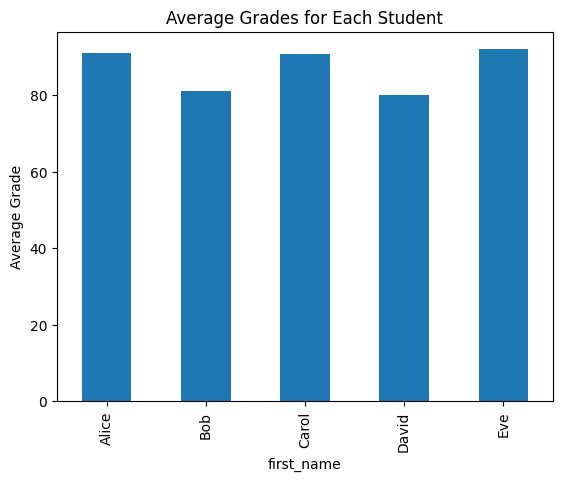

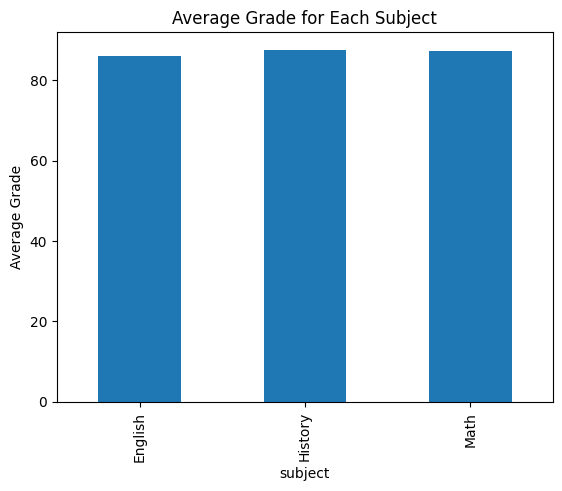

In [9]:
!pip install pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt

# Load data into Pandas DataFrames
students_df = pd.read_sql_query('SELECT * FROM students', conn)
grades_df = pd.read_sql_query('SELECT * FROM grades', conn)

# Merge the two tables
merged_df = pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''', conn)

print(merged_df)

avg_grades_df = merged_df.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()
avg_grades_df.plot(kind='bar', x='first_name', y='grade', legend=False)
plt.title('Average Grades for Each Student')
plt.ylabel('Average Grade')
plt.show()

subject_avg_df = merged_df.groupby('subject')['grade'].mean().reset_index()
subject_avg_df.plot(kind='bar', x='subject', y='grade', legend=False)
plt.title('Average Grade for Each Subject')
plt.ylabel('Average Grade')
plt.show()


('Eve', 'Davis', 'English', 94)
('Carol', 'White', 'History', 91)
('Alice', 'Johnson', 'Math', 95)


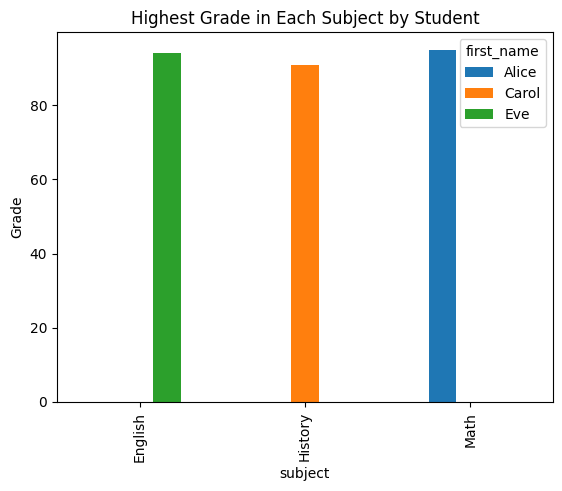

In [10]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, MAX(grades.grade) 
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY grades.subject
''')

highest_per_subject = cursor.fetchall()
for row in highest_per_subject:
    print(row)

highest_per_subject_df = pd.DataFrame(highest_per_subject, columns=['first_name', 'last_name', 'subject', 'max_grade'])
highest_per_subject_df.pivot(index='subject', columns='first_name', values='max_grade').plot(kind='bar')
plt.title('Highest Grade in Each Subject by Student')
plt.ylabel('Grade')
plt.show()


In [11]:
cursor.close()
conn.close()